# Getting Started

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
# !pip install catboost
import catboost as cb

In [ ]:
train_df = pd.read_csv('Hack_Train_Data.csv',parse_dates=True,index_col='date')
test_df = pd.read_csv('Hack_Test_Data.csv',parse_dates=True,index_col='date')
df = pd.concat([train_df,test_df])

In [ ]:
df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [ ]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4889.000000,4889.000000,4889.000000,4889.000000,4571.000000
mean,90.977705,42.454899,2.643461,1.304357,231.865340
std,193.610988,97.591346,13.900229,5.073662,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.190000,0.000000,0.000000
75%,85.000000,38.000000,1.260000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


# Initial Checking 

In [ ]:
test_df

NameError: ignored

In [ ]:
train_df.isnull().sum()

NameError: ignored

In [ ]:
test_df.isnull().sum()

campaign       0
adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
dtype: int64

In [ ]:
print(train_df.campaign.value_counts())
print(test_df.campaign.value_counts())

campaign 1    4571
Name: campaign, dtype: int64
campaign 1    318
Name: campaign, dtype: int64


# Visualisation

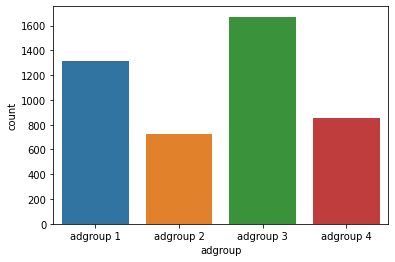

In [ ]:
sns.countplot(x=train_df.adgroup)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


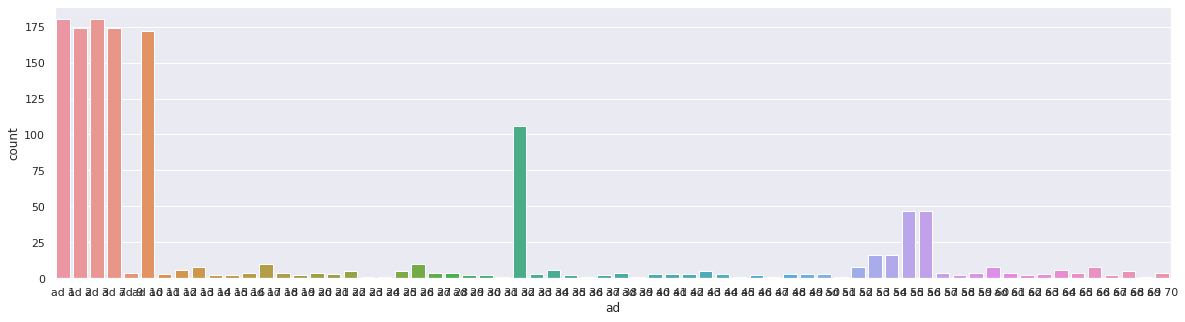

In [ ]:
ax = sns.countplot(train_df[train_df.adgroup=='adgroup 1'].ad);
# ax.set

In [ ]:
print(train_df[train_df.adgroup=='adgroup 1'].revenue.mean())
print(train_df[train_df.adgroup=='adgroup 1'].revenue.max())
print(train_df[train_df.adgroup=='adgroup 2'].revenue.mean())
print(train_df[train_df.adgroup=='adgroup 2'].revenue.max())
print(train_df[train_df.adgroup=='adgroup 3'].revenue.mean())
print(train_df[train_df.adgroup=='adgroup 3'].revenue.max())
print(train_df[train_df.adgroup=='adgroup 4'].revenue.mean())
print(train_df[train_df.adgroup=='adgroup 4'].revenue.max())

392.41312785388124
19149.05
5.158555708390646
536.6
314.84906698564595
20515.41
16.372622377622374
1360.87


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


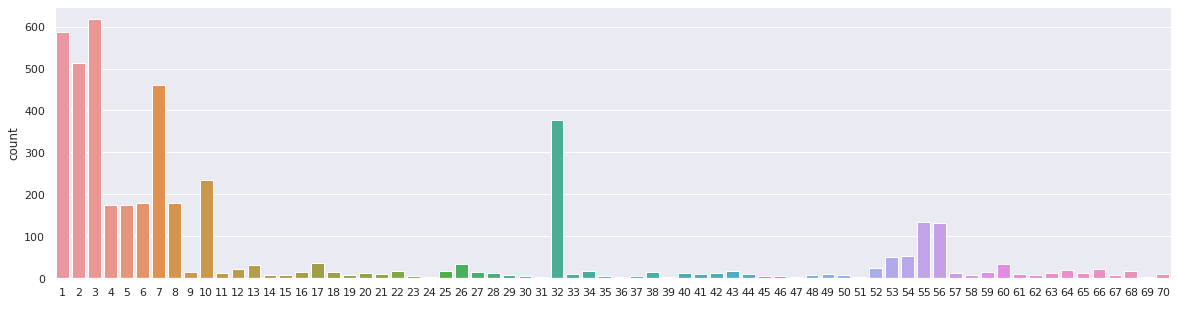

In [ ]:
# train_df.ad.value_counts()
# sns.set(rc={"figure.figsize":10, 4)}) #width=8, height=4
labels = np.arange(1,71)
sns.set(rc={"figure.figsize":(20, 5)});
ax = sns.countplot(train_df.ad);
ax.set(xlabel=' ');
ax.set_xticklabels(labels);


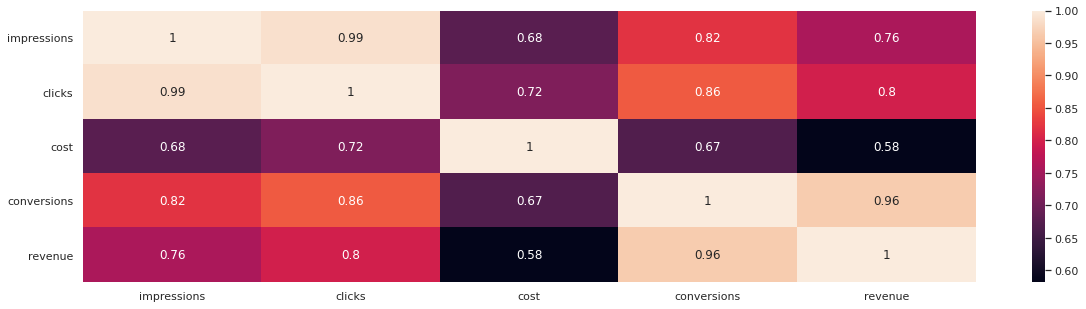

In [ ]:
sns.heatmap(df.corr(),annot = True)
# sns.heatmap(test_df.corr(),annot = True)

In [ ]:
train_df[train_df.adgroup=='adgroup 1'].revenue.describe()

count     1314.000000
mean       392.413128
std       1398.088608
min          0.000000
25%          0.000000
50%          0.000000
75%        272.075000
max      19149.050000
Name: revenue, dtype: float64

In [ ]:
train_df[train_df.adgroup=='adgroup 2'].revenue.describe()

count    727.000000
mean       5.158556
std       36.494660
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      536.600000
Name: revenue, dtype: float64

In [ ]:
train_df[train_df.adgroup=='adgroup 3'].revenue.describe()

count     1672.000000
mean       314.849067
std       1283.068866
min          0.000000
25%          0.000000
50%          0.000000
75%        213.167500
max      20515.410000
Name: revenue, dtype: float64

In [ ]:
train_df[train_df.adgroup=='adgroup 4'].revenue.describe()

count     858.000000
mean       16.372622
std        84.143762
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1360.870000
Name: revenue, dtype: float64

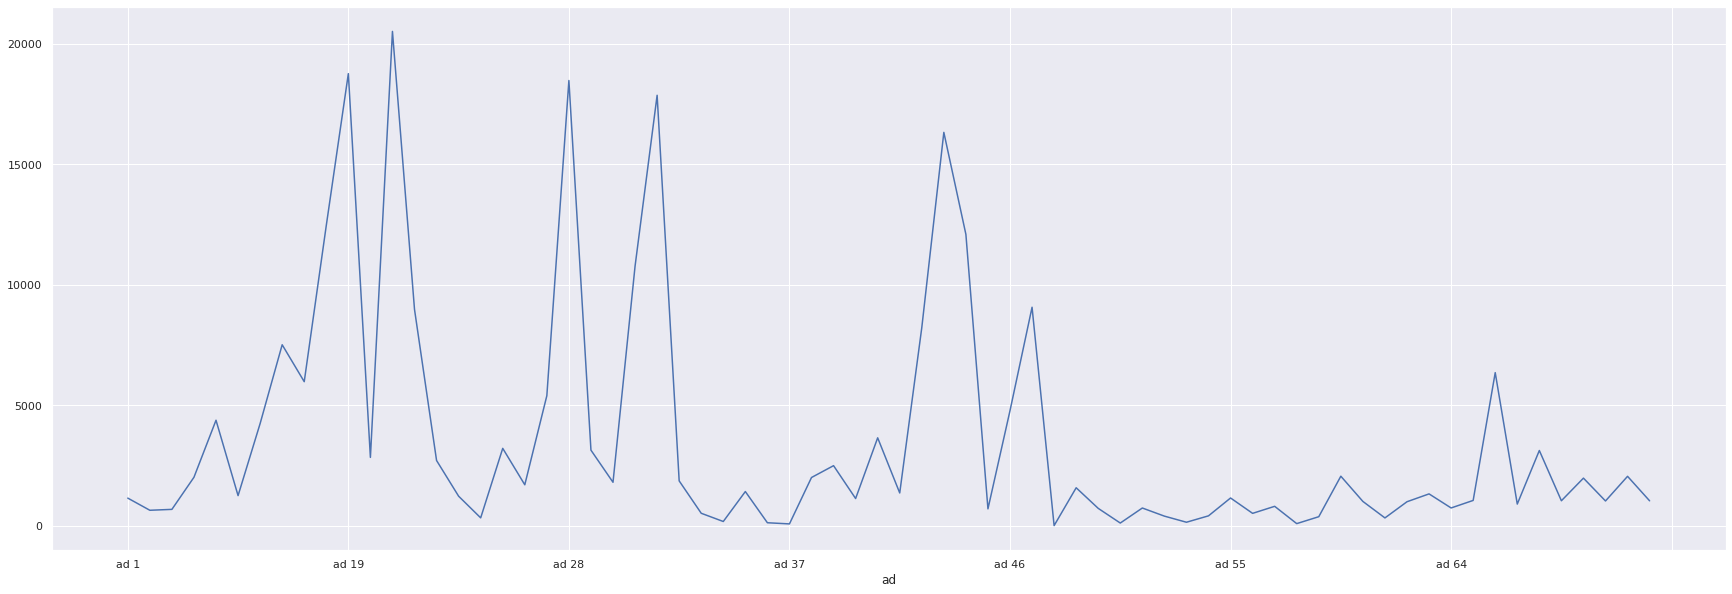

In [ ]:
# train_df[train_df.ad=='ad 1'].revenue.mean()

train_df.groupby('ad').revenue.max().plot(figsize=(30,10))

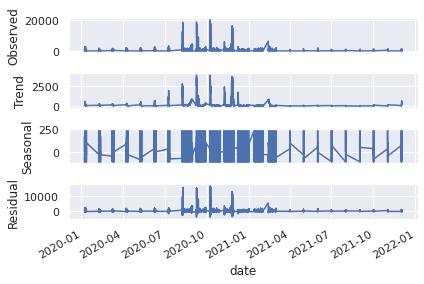

In [ ]:
decomposition = seasonal_decompose(train_df.revenue, freq=30)
decomposition.plot()
plt.show()

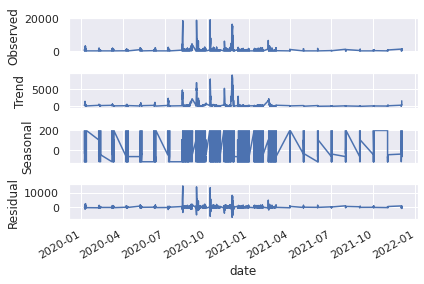

In [ ]:
decomposition = seasonal_decompose(train_df[train_df.adgroup=='adgroup 1'].revenue, freq=7)
decomposition.plot()
plt.show()

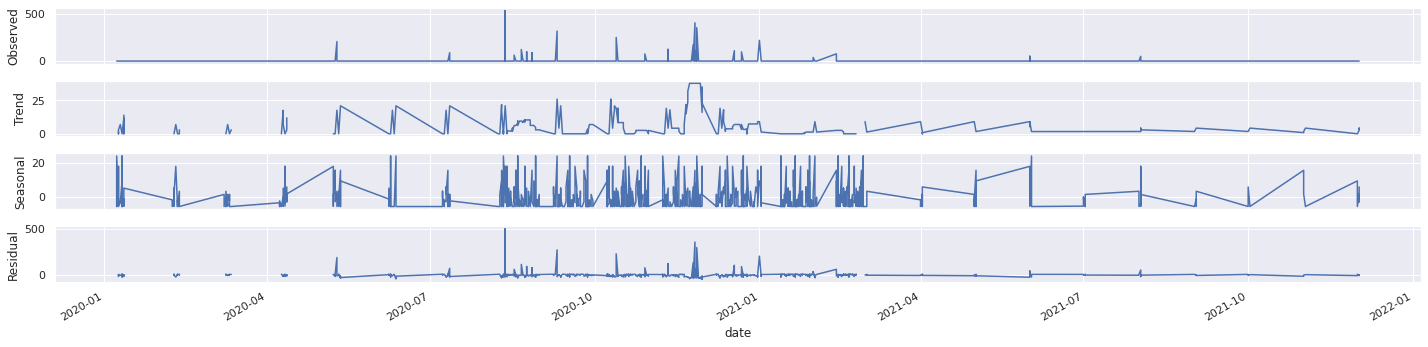

In [ ]:
decomposition = seasonal_decompose(train_df[train_df.adgroup=='adgroup 2'].revenue, freq=30)
decomposition.plot()
plt.show()

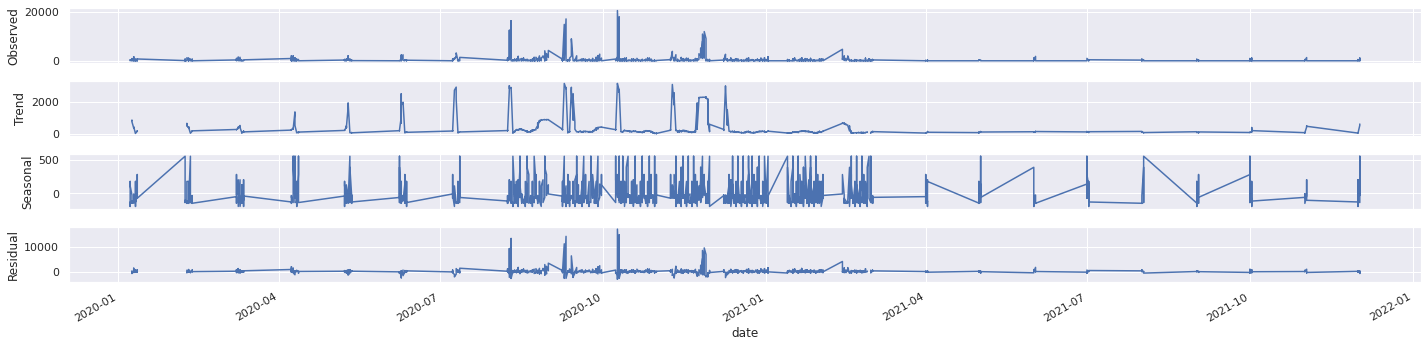

In [ ]:
decomposition = seasonal_decompose(train_df[train_df.adgroup=='adgroup 3'].revenue, freq=30)
decomposition.plot()
plt.show()

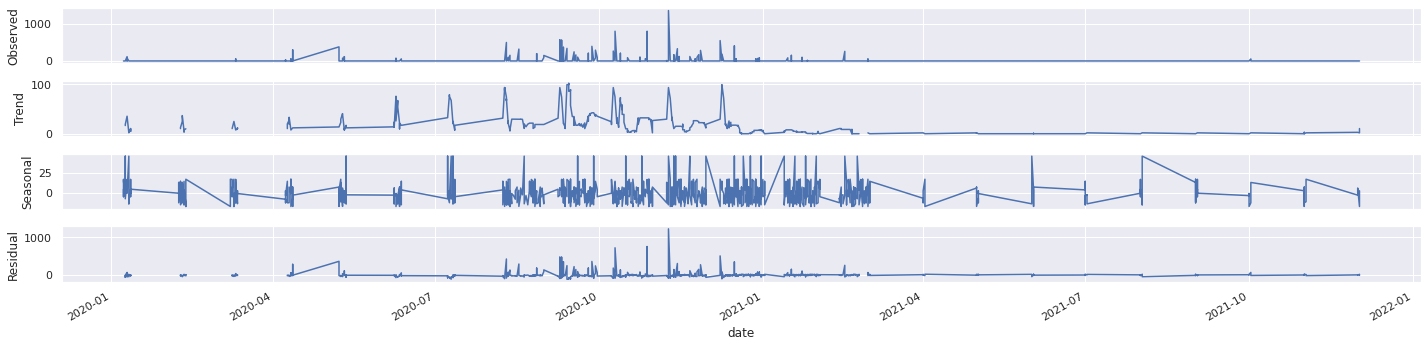

In [ ]:
decomposition = seasonal_decompose(train_df[train_df.adgroup=='adgroup 4'].revenue, freq=30)
decomposition.plot()
plt.show()

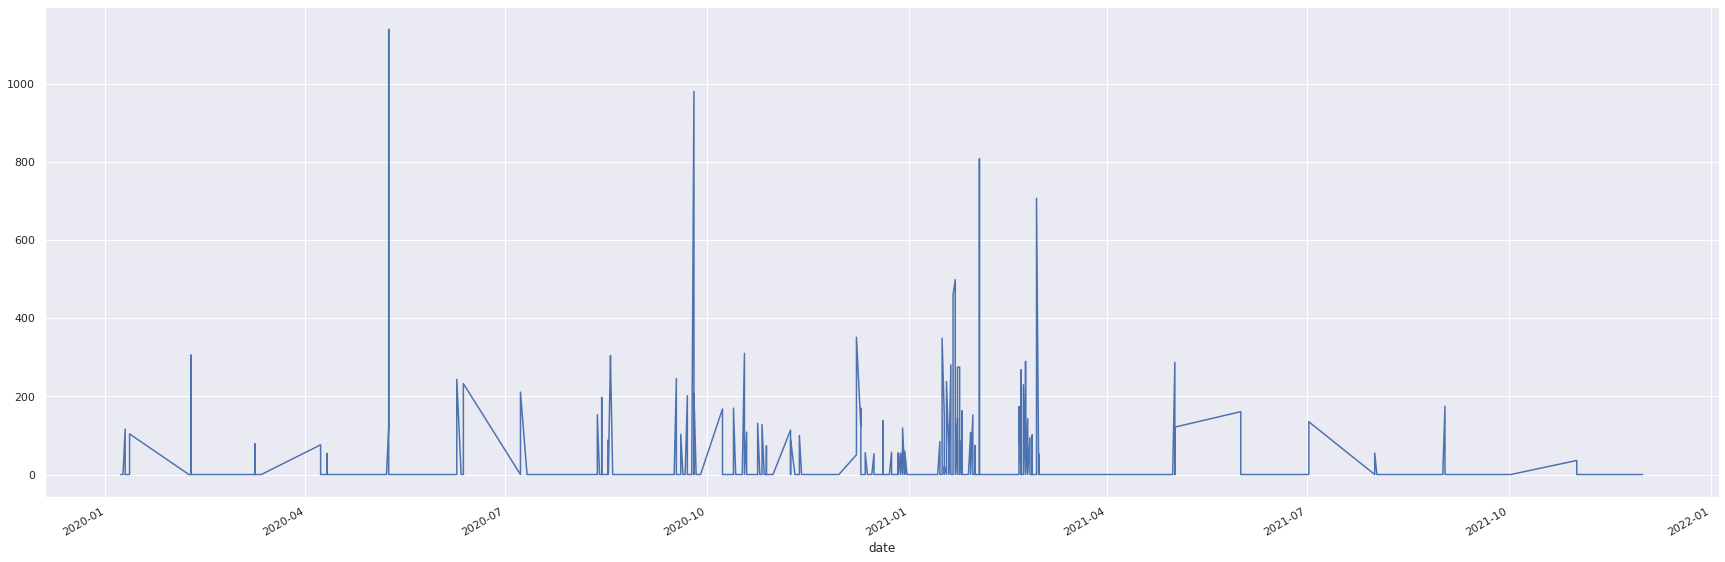

In [ ]:
train_df[(train_df.ad=='ad 1')].revenue.plot(figsize=(30,10))

In [ ]:
train_df[(train_df.ad=='ad 2')].revenue

date
2020-01-08     925.71
2020-01-08       0.00
2020-01-08       0.00
2020-02-08    1476.67
2020-02-08       0.00
               ...   
2021-02-27       0.00
2021-02-27       0.00
2021-02-28       0.00
2021-02-28     217.00
2021-02-28       0.00
Name: revenue, Length: 512, dtype: float64

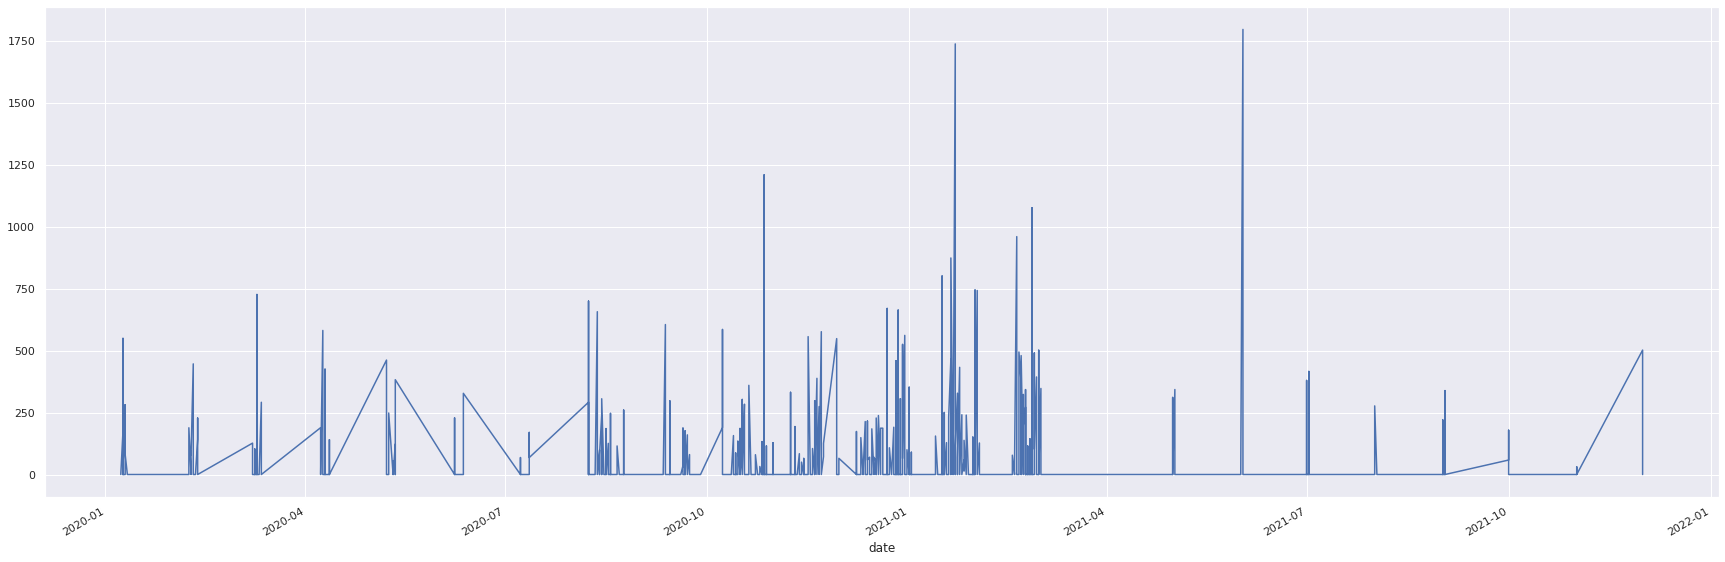

In [ ]:
daframe = train_df[(train_df.ad=='ad 3')]
daframe.revenue.plot(figsize=(30,10))

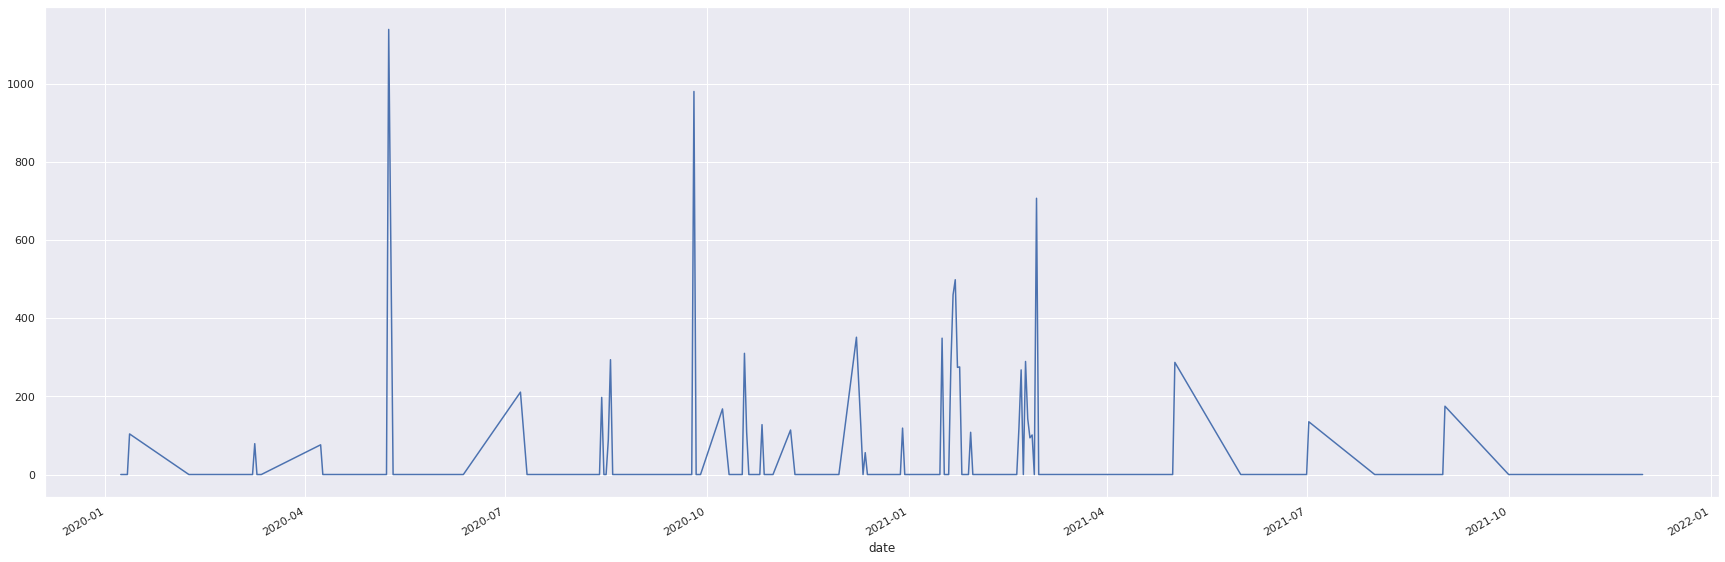

In [ ]:
train_df[(train_df.adgroup=='adgroup 1')&(train_df.ad=='ad 1')].revenue.plot(figsize=(30,10))

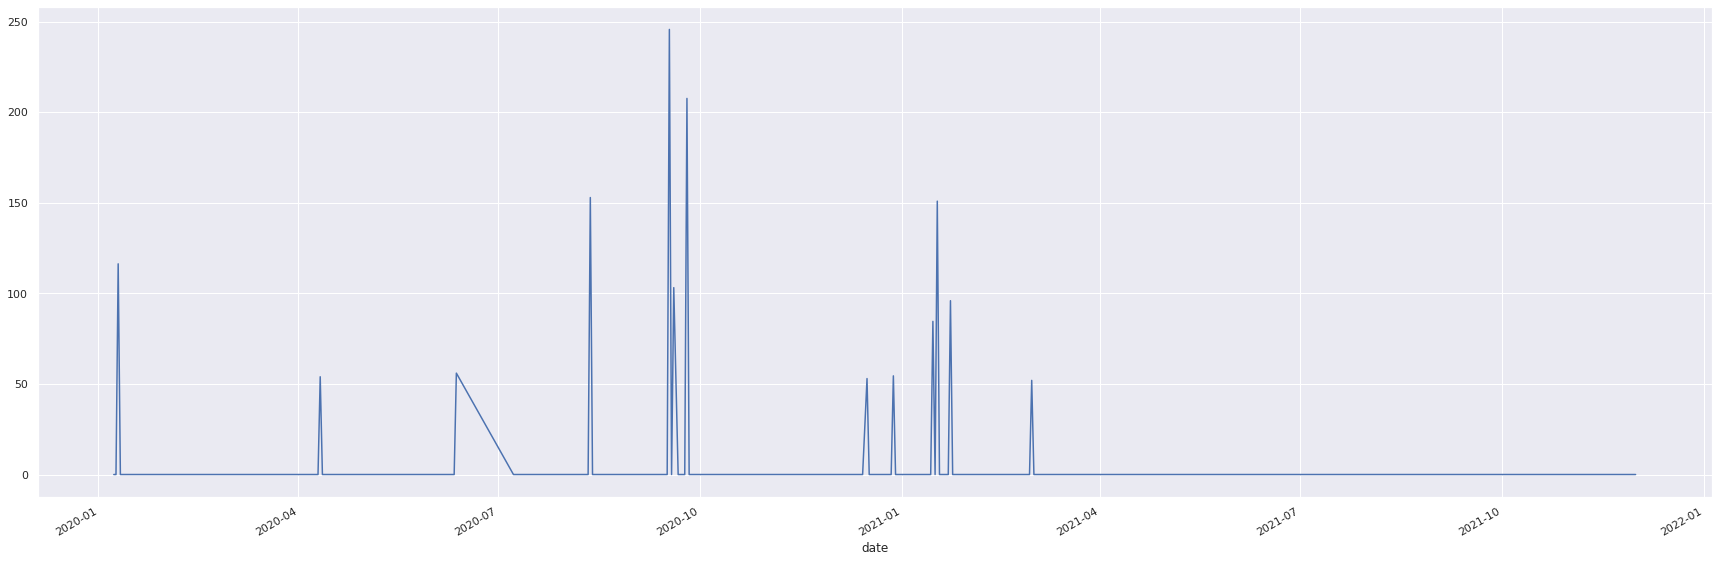

In [ ]:
train_df[(train_df.adgroup=='adgroup 4')&(train_df.ad=='ad 1')].revenue.plot(figsize=(30,10))

##### Maximum values are zero except some special days

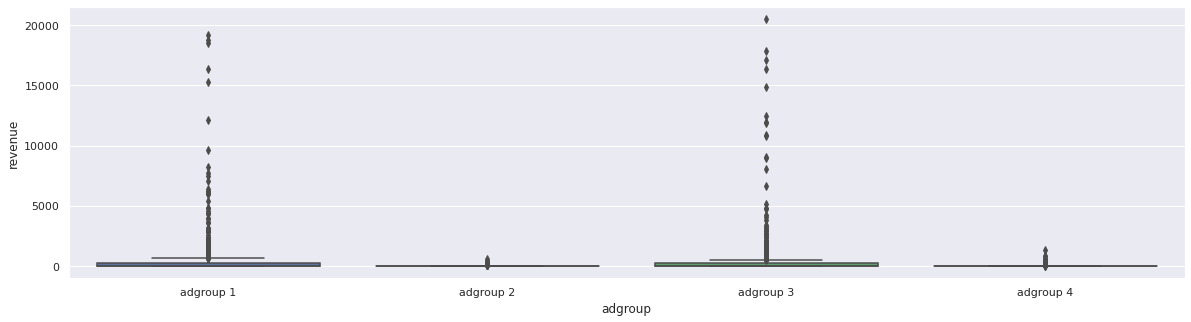

In [ ]:
sns.boxplot(x = train_df.adgroup, y=train_df.revenue)

In [ ]:
train_df.groupby('date').revenue.max()

date
2020-01-08     925.71
2020-01-09    2815.61
2020-01-10    2831.36
2020-01-11    1413.40
2020-01-12     854.40
               ...   
2021-10-02    1132.57
2021-11-01     590.74
2021-11-02    1315.91
2021-12-01    1130.28
2021-12-02    1327.50
Name: revenue, Length: 212, dtype: float64

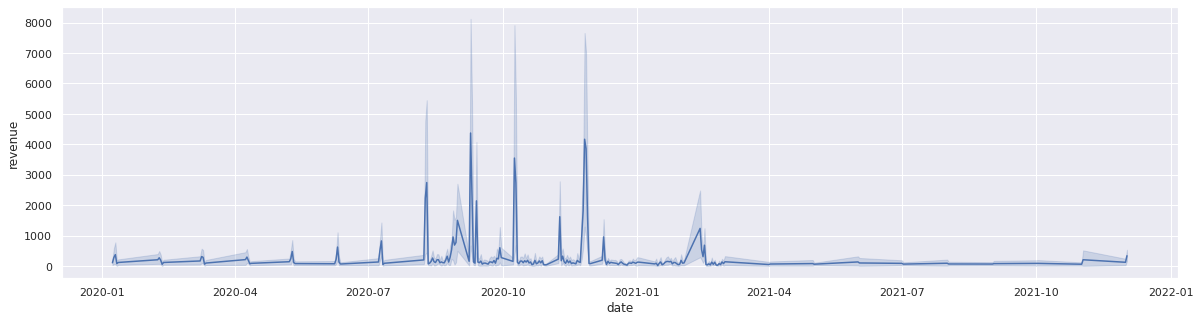

In [ ]:
sns.lineplot(x=train_df.index,y=train_df.revenue)

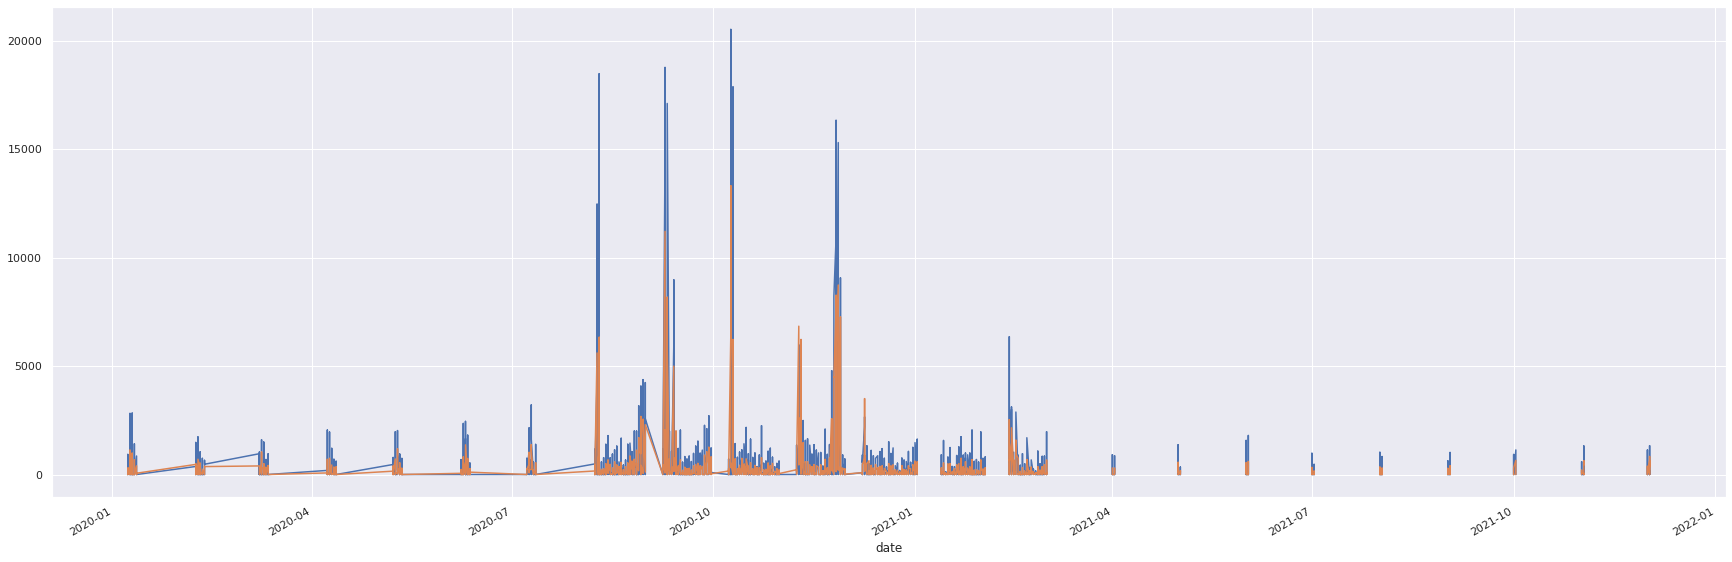

In [ ]:
df.revenue.plot(figsize=(30,10));
df.rolling(window=3).mean()['conversions'].plot(figsize=(30,10));

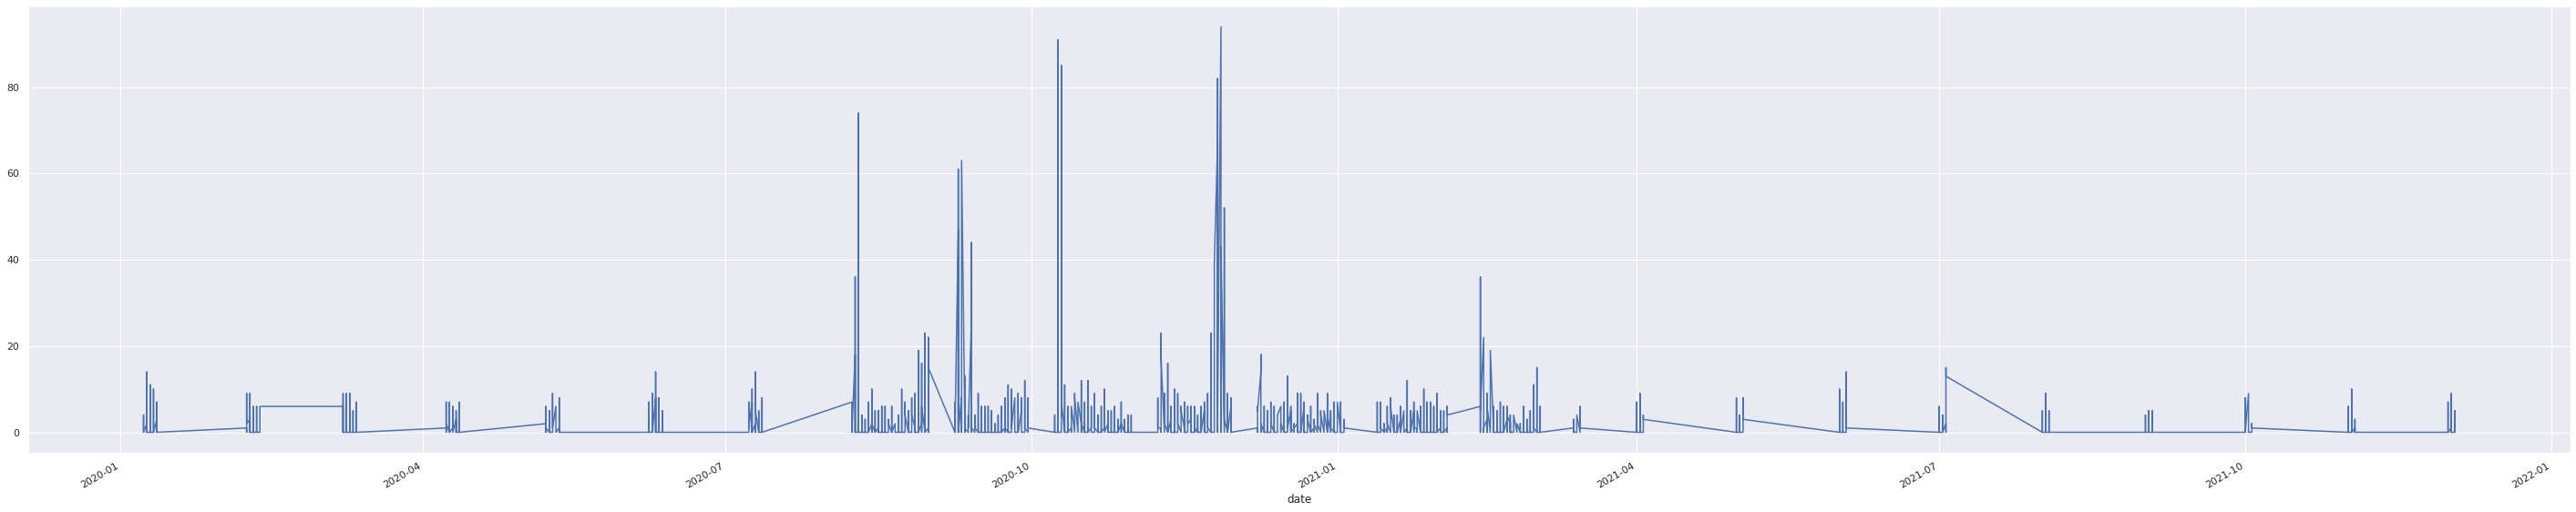

In [ ]:
df.conversions.plot(figsize=(50,10))

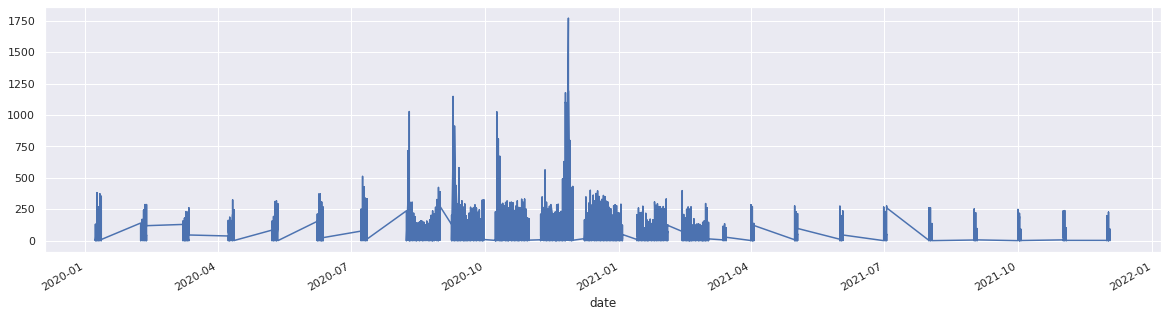

In [ ]:
df.clicks.plot(figsize=(20,5))

In [ ]:
df[(df['conversions']==0)].revenue.max()
df[(df['revenue']==0)].conversions.max()

3

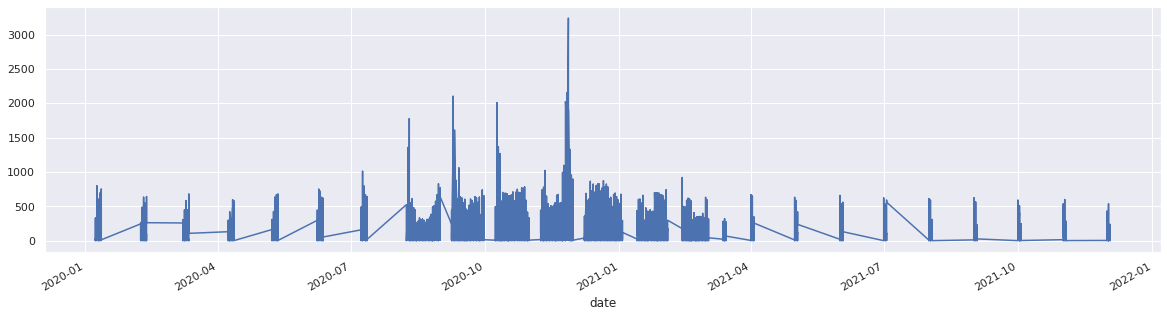

In [ ]:
df.impressions.plot(figsize=(20,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array(['ad 1', 'ad 2', 'ad 3', 'ad 4', 'ad 5', 'ad 6', 'ad 7', 'ad 8',
       'ad 10', 'ad 71', 'ad 72', 'ad 73', 'ad 74', 'ad 75', 'ad 56',
       'ad 55'], dtype=object)

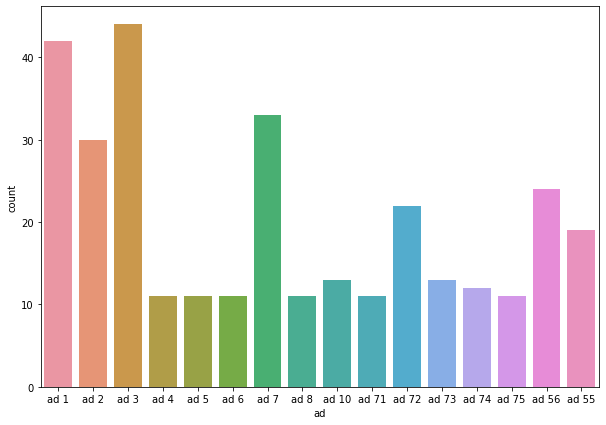

In [ ]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(test_df.ad)
test_df.ad.unique()

# Feature Engineering



In [ ]:
df['CPC'] = df['cost']/df['impressions']
df['CTR'] = df['clicks']/df['impressions']
# df['APC'] = df['conversions']/df['cost']
df['CPA'] = df['cost']/df['conversions']
df['ROI'] = df['revenue']/df['cost']
# df['rolling_conversion'] = df.rolling(window=3).mean()['conversions']
# df['rolling_cost'] = df.rolling(window=3).mean()['cost']
# df['rolling_impressions'] = df.rolling(window=3).mean()['impressions']
# df['rolling_clicks'] = df.rolling(window=3).mean()['conversions']

## There is huge difference in ad and adgroups among themselves

## Advalue imputer

In [ ]:
ad_value={}
for ad in train_df.groupby('ad').revenue.mean().index:
  # integer = ad.slice(2)
  ad_value[ad] = train_df.groupby('ad').revenue.mean()[ad]
total_median = train_df.groupby('ad').revenue.mean().median()

total_median

324.80083333333334

In [ ]:
def meanimputer(ad):
  if ad in ad_value:
    return ad_value[ad]
  else:
    return total_median

In [ ]:
# df['ad_value'] = df['ad'].apply(meanimputer)

In [ ]:
# df['ad_value3'] = df['ad_value']*df['CTR']

## ROI Imputer

In [ ]:
# ROI imputer
mean = df['ROI'].mean()
def roi(val):
  if val[1] == 0 and val[2] == 0:
    return mean
  else :
    return val[0]

In [ ]:
df['ROI'] = df[['ROI','cost','revenue']].apply(roi,axis=1)

In [ ]:
df['ROI'].isnull().sum()

318

## CPA misssing values filling

In [ ]:
df['CPA'].median()

inf

In [ ]:
df.CPA.fillna(value=df.CPA.median(),inplace=True)

## Ad imputed with ROI

In [ ]:
# adgroup_value={}
# for ad in df.groupby('adgroup').ROI.mean().index:
#   adgroup_value[ad] = df.groupby('adgroup').ROI.mean()[ad]
ad_value={}
for ad in df.groupby('ad').ROI.mean().index:
  ad_value[ad] = df.groupby('ad').ROI.mean()[ad]

total_group_median = df.groupby('adgroup').ROI.mean().mean()
total_median = df.groupby('ad').ROI.mean().mean()

In [ ]:
# def groupimputer(ad):
#   if ad in adgroup_value:
#     return adgroup_value[ad]
#   else:
#     return total_group_median

def adimputer(ad):
  if ad in ad_value and str(ad_value[ad]) != 'nan':
    return ad_value[ad]
  else:
    return total_median

In [ ]:
# df['ad_group_value'] = df[['adgroup','ROI']].apply(groupimputer)
df['ad_value2'] = df['ad'].apply(adimputer)
# df['ad_value4'] = df['ad_value2']*df['CTR']

In [ ]:
def function(ad):
  getval = int(ad[3:])
  if ad in test_df.ad.unique() and ad in train_df.ad.unique():
    return getval
  else:
    return 0

In [ ]:
df.head()
# df['ad_cols'] =  df['ad'].apply(function)
# df['ad_cols'].value_counts()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ROI,ad_value2
date,,,,,,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.003333,0.250000,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,inf,169.080644,157.440141
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.003077,0.307692,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.016000,0.800000,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,717.604651,185.829749


In [ ]:
df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ROI,ad_value2
date,,,,,,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.003333,0.250000,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,inf,169.080644,157.440141
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.003077,0.307692,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.016000,0.800000,inf,0.000000,157.440141
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,717.604651,185.829749


In [ ]:
df.isnull().sum()

campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue        318
CPC              0
CTR              0
CPA              0
ROI            318
ad_value2        0
dtype: int64

# One Hot encoding

In [ ]:
df =  pd.get_dummies(df,columns=['adgroup'],drop_first=True)
df

,campaign,ad,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ROI,ad_value2,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,,,,,,
2020-01-08,campaign 1,ad 1,24,6,0.08,0,0.00,0.003333,0.250000,inf,0.000000,157.440141,0,0,0
2020-01-08,campaign 1,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,inf,169.080644,157.440141,1,0,0
2020-01-08,campaign 1,ad 1,13,4,0.04,0,0.00,0.003077,0.307692,inf,0.000000,157.440141,0,1,0
2020-01-08,campaign 1,ad 1,5,4,0.08,0,0.00,0.016000,0.800000,inf,0.000000,157.440141,0,0,1
2020-01-08,campaign 1,ad 2,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,717.604651,185.829749,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,campaign 1,ad 55,1,1,0.01,0,NaN,0.010000,1.000000,inf,NaN,284.412247,0,0,1
2021-03-15,campaign 1,ad 55,5,1,0.01,0,NaN,0.002000,0.200000,inf,NaN,284.412247,0,1,0
2021-03-15,campaign 1,ad 55,25,11,0.14,0,NaN,0.005600,0.440000,inf,NaN,284.412247,0,0,0


In [ ]:
len(df.columns)

15

# Drop Irrelevant columns

In [ ]:
df = df.drop(columns=['campaign','ad','ROI','CPA'])
# df = df.drop(columns=['ROI','CPA','impressions','clicks','cost'])
len(df.columns)
df

,impressions,clicks,cost,conversions,revenue,CPC,CTR,ad_value2,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,,
2020-01-08,24,6,0.08,0,0.00,0.003333,0.250000,157.440141,0,0,0
2020-01-08,1,0,0.00,0,0.00,0.000000,0.000000,157.440141,1,0,0
2020-01-08,13,4,0.04,0,0.00,0.003077,0.307692,157.440141,0,1,0
2020-01-08,5,4,0.08,0,0.00,0.016000,0.800000,157.440141,0,0,1
2020-01-08,247,126,1.29,4,925.71,0.005223,0.510121,185.829749,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,1,1,0.01,0,NaN,0.010000,1.000000,284.412247,0,0,1
2021-03-15,5,1,0.01,0,NaN,0.002000,0.200000,284.412247,0,1,0
2021-03-15,25,11,0.14,0,NaN,0.005600,0.440000,284.412247,0,0,0


In [ ]:
df.isna().sum()

impressions            0
clicks                 0
cost                   0
conversions            0
revenue              318
CPC                    0
CTR                    0
ad_value2              0
adgroup_adgroup 2      0
adgroup_adgroup 3      0
adgroup_adgroup 4      0
dtype: int64

# Train Test split

In [ ]:
train_data = df[df['revenue'].notna()]
train_data.tail() 
test_data = df[df['revenue'].isna()]
test_data.tail() 
test_data = test_data.drop(columns=['revenue'])

In [ ]:
test_data

,impressions,clicks,cost,conversions,CPC,CTR,ad_value2,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,
2021-01-03,121,49,0.58,1,0.004793,0.404959,157.440141,0,0,0
2021-01-03,22,12,0.17,0,0.007727,0.545455,157.440141,0,1,0
2021-01-03,5,3,0.05,0,0.010000,0.600000,157.440141,0,0,1
2021-01-03,2,1,0.01,0,0.005000,0.500000,157.440141,1,0,0
2021-01-03,3,1,0.01,0,0.003333,0.333333,185.829749,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-03-15,1,1,0.01,0,0.010000,1.000000,284.412247,0,0,1
2021-03-15,5,1,0.01,0,0.002000,0.200000,284.412247,0,1,0
2021-03-15,25,11,0.14,0,0.005600,0.440000,284.412247,0,0,0


In [ ]:
# df.drop(columns=['campaign','ad','adgroup'],axis=1,inplace=True)
X = train_data.drop(columns=['revenue'])
y = train_data.revenue
X_train = X[:3200]
y_train = y[:3200]
X_valid = X[3200:]
y_valid = y[3200:]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = RepeatedKFold(n_splits=4, n_repeats=1, random_state=1)

# Cat Boost 

In [ ]:
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_valid, y_valid)
reg = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.01,0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
reg.grid_search(grid, train_dataset,verbose=False);

In [ ]:
y_pred = reg.predict(X_valid);
print(mean_squared_error(y_valid,y_pred,squared=False));

136.19424147500885


In [ ]:
predictions = reg.predict(test_data);

# Linear Regression

In [ ]:
reg = LinearRegression()

# Lightboost

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['RMSE'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000,
}

In [ ]:
gbm = lgb.LGBMRegressor(**hyper_params)

NameError: ignored

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='RMSE')

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[5383]	valid_0's rmse: 146.414
[5384]	valid_0's rmse: 146.391
[5385]	valid_0's rmse: 146.44
[5386]	valid_0's rmse: 146.417
[5387]	valid_0's rmse: 146.435
[5388]	valid_0's rmse: 146.452
[5389]	valid_0's rmse: 146.455
[5390]	valid_0's rmse: 146.439
[5391]	valid_0's rmse: 146.459
[5392]	valid_0's rmse: 146.469
[5393]	valid_0's rmse: 146.492
[5394]	valid_0's rmse: 146.513
[5395]	valid_0's rmse: 146.535
[5396]	valid_0's rmse: 146.545
[5397]	valid_0's rmse: 146.567
[5398]	valid_0's rmse: 146.552
[5399]	valid_0's rmse: 146.573
[5400]	valid_0's rmse: 146.579
[5401]	valid_0's rmse: 146.594
[5402]	valid_0's rmse: 146.618
[5403]	valid_0's rmse: 146.63
[5404]	valid_0's rmse: 146.631
[5405]	valid_0's rmse: 146.646
[5406]	valid_0's rmse: 146.661
[5407]	valid_0's rmse: 146.673
[5408]	valid_0's rmse: 146.687
[5409]	valid_0's rmse: 146.702
[5410]	valid_0's rmse: 146.726
[5411]	valid_0's rmse: 146.709
[5412]	valid_0's rmse: 146.696
[5413]	valid_0's rmse

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['RMSE'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', round(mean_squared_error(y_pred, y_valid) ** 0.5, 5))

# model = gbm
# model.fit(X,y)
# predictions = model.predict(test_data)
# predictions

The rmse of prediction is: 128.78219


In [ ]:
predictions = gbm.predict(test_data,num_iteration=gbm.best_iteration_)

# Xgboost

In [ ]:
# xgb = XGBRegressor()
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.1,0.03, 0.01], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,150,200,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   24.2s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:   42.5s finished


0.8039655530562635
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
model = Pipeline([sc,('XGB', xgb_grid)])

In [ ]:
model.fit(X_train,y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.9s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:   39.2s finished


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 GridSearchCV(cv=2, error_score=nan,
                              estimator=XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0,
                                                     importance_type='gain',
                                                     learning_rate=0.1,
                                                     max_delta_step=0,
                                                     max_depth=3,
                                                     min_child_weight=1,
                 

In [ ]:
y_pred = model.predict(X_valid)
print(mean_squared_error(y_valid,y_pred,squared=False));

135.09309569265955


In [ ]:
model.fit(X,y)
predictions = model.predict(test_data)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   25.4s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:   48.5s finished


In [ ]:
predictions

array([ 1.56293808e+02, -9.44824100e-01,  2.53049552e-01,  7.28310645e-01,
       -5.42478561e-02,  8.47026885e-01,  1.58658386e+02,  9.77942944e-02,
        1.24063751e+02, -4.32782125e+00,  1.85035950e+02,  7.81537628e+00,
       -2.68146217e-01,  4.15225647e+02,  4.20812666e-02,  8.64006882e+01,
        1.60991162e-01,  2.13669754e+02, -1.96839142e+00,  1.08024498e+02,
        6.27430677e-02,  7.99840331e-01,  4.20812666e-02,  3.21872406e+02,
       -1.84743404e-01,  6.05154276e-01,  5.76411560e+02,  1.28074249e+02,
       -7.07470059e-01,  9.77942944e-02,  4.03871490e+02,  1.37902677e-01,
        1.15911328e+03,  3.43044678e+02,  8.33287735e+01,  9.33680534e-02,
        1.13475792e+02,  2.34091401e-01,  6.27430677e-02, -1.05794048e+00,
       -2.72874236e-02, -1.83783984e+00,  9.77942944e-02, -6.32584143e+00,
        3.75148869e+00,  2.30149031e-02, -9.36876535e-01, -4.65631068e-01,
       -1.51066551e+01, -3.37022424e-01,  6.27430677e-02,  1.60917133e-01,
       -2.31976748e+00,  

# Deep Learning With Keras

In [ ]:
df.columns

Index(['impressions', 'clicks', 'cost', 'conversions', 'revenue', 'CPC', 'CTR',
       'APC', 'ad_value2', 'ad_value', 'adgroup_adgroup 2',
       'adgroup_adgroup 3', 'adgroup_adgroup 4'],
      dtype='object')

In [ ]:
X = X[['impressions', 'clicks', 'cost','conversions']]
y = train_data['revenue']

In [ ]:
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def baseline_model():
  model=Sequential()
  model.add(Dense(8, input_dim=24,kernel_initializer='normal', activation='relu'))
  model.add(Dense(8, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  # model.summary()
  return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=1, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=4)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: nan (nan) MSE


# Generating Predictions

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored

# Checking accuracy of score

In [ ]:
# # Cross validations might not be a good idea
# scores = cross_val_score(reg,X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# scores = np.absolute(scores)
# print(scores)
# # print('Mean MAE: %.3f (%.3f)' % np.sqrt(scores.mean(), scores.std()) )

[293.99177509 185.37649788 274.19492615 183.37949991 178.34800844
 245.14418653 188.03929539 274.91975133 418.64245226 245.78704915
 266.82247788 218.76238121]


In [ ]:
# print(scores)

[293.99177509 185.37649788 274.19492615 183.37949991 178.34800844
 245.14418653 188.03929539 274.91975133 418.64245226 245.78704915
 266.82247788 218.76238121]


# Feature Importance

In [ ]:
#Linear Reg 
# print(reg.coef_)

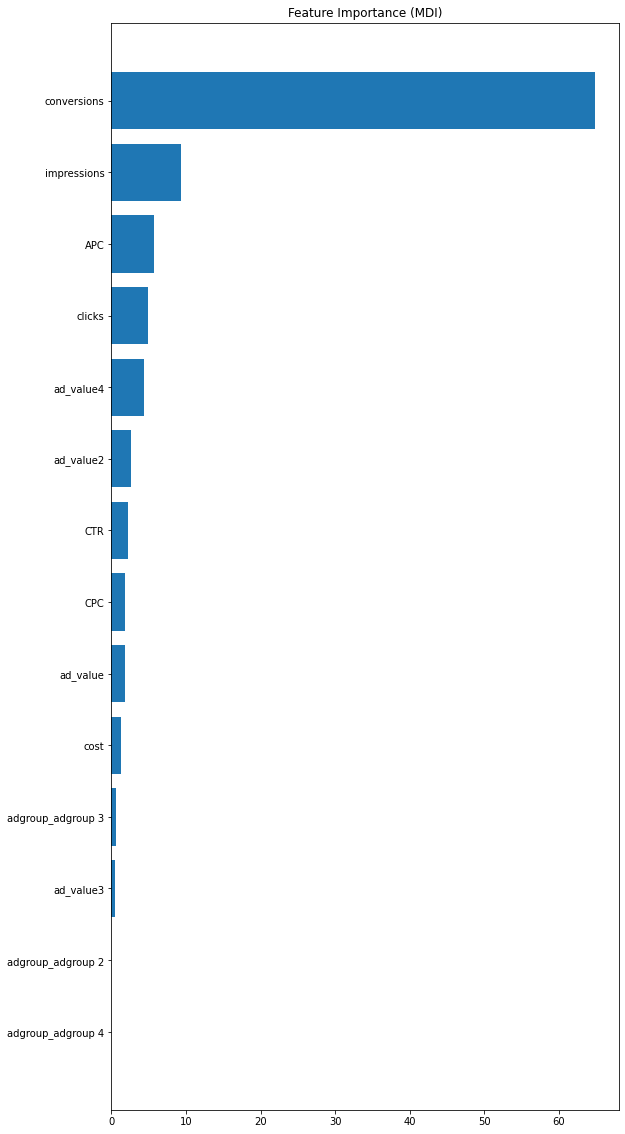

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

# Wrapping up

In [ ]:
fin_df = test_data[['conversions']].copy()
fin_df['revenue'] = predictions
fin_df

,conversions,revenue
date,,
2021-01-03,1,160.345306
2021-01-03,0,8.155023
2021-01-03,0,0.699309
2021-01-03,0,3.138605
2021-01-03,0,4.232671
...,...,...
2021-03-15,0,-3.349229
2021-03-15,0,-7.157427
2021-03-15,0,3.990794


In [ ]:
def funct(pred):
  if pred[0]==0:
    return 0;
  elif pred[1]<0:
    return 0;
  else:
    return pred[1];

In [ ]:
fin_df['revenue'] = fin_df[['conversions','revenue']].apply(funct,axis=1)

In [ ]:
fin_df

,conversions,revenue
date,,
2021-01-03,1,160.345306
2021-01-03,0,0.000000
2021-01-03,0,0.000000
2021-01-03,0,0.000000
2021-01-03,0,0.000000
...,...,...
2021-03-15,0,0.000000
2021-03-15,0,0.000000
2021-03-15,0,0.000000


In [ ]:
fin_df = fin_df[['revenue']]
fin_df = fin_df.set_index('revenue')

In [ ]:
fin_df

""
revenue
160.345306
0.000000
0.000000
0.000000
0.000000
...
0.000000
0.000000
0.000000


In [ ]:
fin_df.index.max()

2355.8081646908445

In [ ]:
fin_df.to_csv("M3_Feature_prediction_results.csv")

In [ ]:
!pip install tensorflow